# PROJETO PARA PPGTI3004 - CIÊNCIA DE DADOS
## INTRODUÇÃO
Esse projeto busca utilizar os dados coletados para analisar, tratar e, utilizando as técnicas de Aprendizagem Não Supervisionada, classificar grupos para que seja possível identificar o nível de produtividade de determinado usuário.
 
## DATASET
Os dados utilizados como objeto do presente estudo trazem o conjunto de atividades referente à atuação das pessoas que atuam na área jurídica de um Órgão da Justiça, durante o período de janeiro de 2019 a dezembro de 2022. Sendo considerados seguintes critérios: quantidades diárias de expedientes criados e anexados aos processos, com suas diversas classificações, cidade da unidade de atuação, papel que atua na unidade (Analista, Técnico, Assistente, Assessor, Diretor, sendo classificados como assistente as pessoas sem vínculo com o órgão analisado), idade, quantidade de filhos, grau de formação, se possui formação jurídica, tempo de serviço, se ocupa função. 


In [12]:
import pandas as pd 
import numpy as np

### Importing Dataset
dataset = pd.read_csv('datasetServidor.csv',encoding='ISO-8859-1')
dataset.info()
dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143187 entries, 0 to 143186
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   id_chave           143187 non-null  int64 
 1   dt_doc             143187 non-null  object
 2   fl_pandemia        143187 non-null  object
 3   ds_orgao           143187 non-null  object
 4   ds_cidade          143187 non-null  object
 5   despachos          143187 non-null  int64 
 6   decisao            143187 non-null  int64 
 7   sentenca           143187 non-null  int64 
 8   intimacao          143187 non-null  int64 
 9   mandado            143187 non-null  int64 
 10  notificacao        143187 non-null  int64 
 11  certidao           143187 non-null  int64 
 12  ataaudiencia       143187 non-null  int64 
 13  docdiverso         143187 non-null  int64 
 14  alvara             143187 non-null  int64 
 15  calculos           143187 non-null  int64 
 16  peticaopdf         1

,id_chave,dt_doc,fl_pandemia,ds_orgao,ds_cidade,despachos,decisao,sentenca,intimacao,mandado,...,docdiverso,alvara,calculos,peticaopdf,cartaprecatoria,fl_sexo,un_lotacao,ds_cargo,nu_idade_dias,nu_tempo_svc_dias
0,7,11/01/2021,S,VTN10,Natal,1,0,1,0,0,...,0,0,0,0,0,M,10VTN,NaN,19561,609
1,7,13/01/2021,S,VTN10,Natal,4,0,1,0,0,...,0,0,0,0,0,M,10VTN,NaN,19563,611
2,7,19/01/2021,S,VTN10,Natal,3,3,3,0,0,...,0,0,0,0,0,M,10VTN,NaN,19569,617
3,7,20/01/2021,S,VTN10,Natal,3,0,0,0,0,...,0,0,0,0,0,M,10VTN,NaN,19570,618
4,7,21/01/2021,S,VTN10,Natal,1,0,0,0,0,...,0,0,0,0,0,M,10VTN,NaN,19571,619


## DATASET FOCADO NO USUÁRIO
Utilizando o método groupby para agrupar os dados em apenas id_chave, fl_pandemia, ds_orgao, un_lotacao e ds_cargo;
o método agg do Pandas será utilizado para aplicar diferentes funções de agregação a diferentes colunas em um objeto GroupBy;
função sum irá somar os elementos da coluna; a função first irá selecionar o primeiro elemento; e a função mean irá fazer a média da idade e tempo de serviço.

In [22]:
dt_copia = dataset.copy()
dt_copia = dt_copia.drop('dt_doc', axis=1) #Excluindo a coluna data para analisar os números brutos
dataset_agrupado = dt_copia.groupby(['id_chave',
                                     'fl_pandemia',
                                     'ds_orgao',
                                     'un_lotacao',
                                     'ds_cargo']).agg({'ds_cidade':'first',
                                                       'despachos':'sum',
                                                       'decisao':'sum',
                                                       'sentenca':'sum',
                                                       'intimacao':'sum',
                                                       'mandado':'sum',
                                                       'notificacao':'sum',
                                                       'certidao':'sum',
                                                       'ataaudiencia':'sum',
                                                       'docdiverso':'sum',
                                                       'alvara':'sum',
                                                       'calculos':'sum',
                                                       'peticaopdf':'sum',
                                                       'cartaprecatoria':'sum',
                                                       'fl_sexo':'first',
                                                       'nu_idade_dias':'mean',
                                                       'nu_tempo_svc_dias':'mean'
                                                      }).reset_index()
dataset_agrupado.info()
dataset_agrupado.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1162 entries, 0 to 1161
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_chave           1162 non-null   int64  
 1   fl_pandemia        1162 non-null   object 
 2   ds_orgao           1162 non-null   object 
 3   un_lotacao         1162 non-null   object 
 4   ds_cargo           1162 non-null   object 
 5   ds_cidade          1162 non-null   object 
 6   despachos          1162 non-null   int64  
 7   decisao            1162 non-null   int64  
 8   sentenca           1162 non-null   int64  
 9   intimacao          1162 non-null   int64  
 10  mandado            1162 non-null   int64  
 11  notificacao        1162 non-null   int64  
 12  certidao           1162 non-null   int64  
 13  ataaudiencia       1162 non-null   int64  
 14  docdiverso         1162 non-null   int64  
 15  alvara             1162 non-null   int64  
 16  calculos           1162 

,id_chave,fl_pandemia,ds_orgao,un_lotacao,ds_cargo,ds_cidade,despachos,decisao,sentenca,intimacao,...,certidao,ataaudiencia,docdiverso,alvara,calculos,peticaopdf,cartaprecatoria,fl_sexo,nu_idade_dias,nu_tempo_svc_dias
0,11,N,VTN1,DIMON,ANALISTA JUDICIARIO,Natal,72,0,0,0,...,28,0,32,4,0,0,0,M,13451.392857,236.392857
1,12,N,VTASSU,PAPF,TÉCNICO JUDICIARIO,Assu,0,0,0,144,...,285,54,147,0,0,0,0,F,14038.923077,1200.923077
2,12,N,VTM4,PAPF,TÉCNICO JUDICIARIO,Mossoró,14,0,3,8,...,14,0,0,0,0,0,0,F,13011.181818,173.181818
3,12,N,VTMACAU2,PAPF,TÉCNICO JUDICIARIO,Macau,2692,692,780,5296,...,5056,2000,9452,128,500,0,0,F,13412.905775,574.905775
4,12,S,VTMACAU2,PAPF,TÉCNICO JUDICIARIO,Macau,3272,276,412,5668,...,3508,3860,1628,0,4,0,0,F,13652.206294,814.206294


## NORMALIZAÇÃO DO dataset_agrupado
A normalização tende a deixar o resultado final do clustering mais fidedígno.

In [24]:
from sklearn.preprocessing import minmax_scale
def normalizar(dataset,name_dataset):
  ### Retirando os missing values
  dataset_dropped = dataset.dropna(axis=0, how='any')
  dataset_dropped.info()


  # Obtendo os nomes das colunas Numéricas
  tipos_numericos = ['int32', 'int64', 'float16', 'float32', 'float64']
  cols_num = dataset_dropped.select_dtypes(include=tipos_numericos)

  ## selecionando as colunas
  colunas_numericas = list(cols_num.columns)

  # Copiando os dataset e aplicando a normalizacao
  dataset_amp = dataset_dropped.copy()
  dataset_amp[colunas_numericas] = dataset_dropped[colunas_numericas].apply(minmax_scale)

  # Visualização dos novos atributos
  dataset_amp.info()

  # Obtendo os nomes das colunas Categóricas
  tipos_categoricos = ['object']
  cols_cat = dataset_amp.select_dtypes(include=tipos_categoricos)
  type(cols_cat)
  print(cols_cat)
  if cols_cat.shape[1] != 0:
    # Binarizando os atributos categóricos
    categoricoToBinary = pd.get_dummies(cols_cat)
    dataset = dataset_amp.join(categoricoToBinary)

    # Dropando os atributos categóricos originais
    dataset.drop(cols_cat.columns.to_list(), axis=1, inplace=True)
  else:
    dataset = dataset_amp.copy()

  # Salvando Pessoa.csv transformado
  df = pd.DataFrame(dataset)
  df.to_csv(name_dataset+'Norm.csv', index=False)
  return df
datasetNorm = normalizar(dataset_agrupado,'datasetServidor')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1162 entries, 0 to 1161
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_chave           1162 non-null   int64  
 1   fl_pandemia        1162 non-null   object 
 2   ds_orgao           1162 non-null   object 
 3   un_lotacao         1162 non-null   object 
 4   ds_cargo           1162 non-null   object 
 5   ds_cidade          1162 non-null   object 
 6   despachos          1162 non-null   int64  
 7   decisao            1162 non-null   int64  
 8   sentenca           1162 non-null   int64  
 9   intimacao          1162 non-null   int64  
 10  mandado            1162 non-null   int64  
 11  notificacao        1162 non-null   int64  
 12  certidao           1162 non-null   int64  
 13  ataaudiencia       1162 non-null   int64  
 14  docdiverso         1162 non-null   int64  
 15  alvara             1162 non-null   int64  
 16  calculos           1162 

## COMPARAÇÃO ENTRE MÉTODOS DE CLUSTERING
Conforme foi visto durante o curso, podemos comparar os métodos de clustering para verificar qual é o que tem melhor aderência a nosso dataset. Os métodos que serão analisados serão:

Técnicas DB
K-means, HAav, EM_k-M

Técnicas Silhouette
K-means, HAav, EM_k-M

k-means_s37 (k = 2) - DB=> 2.672
k-means_s37 (k = 3) - DB=> 2.495
k-means_s37 (k = 4) - DB=> 2.515
k-means_s37 (k = 5) - DB=> 2.440
k-means_s37 (k = 6) - DB=> 2.400
k-means_s37 (k = 7) - DB=> 2.275
k-means_s37 (k = 8) - DB=> 2.293
k-means_s37 (k = 9) - DB=> 2.375
k-means_s37 (k = 10) - DB=> 2.328
k-means_s37 (k = 11) - DB=> 2.343
k-means_s37 (k = 12) - DB=> 2.344
k-means_s37 (k = 13) - DB=> 2.175
k-means_s37 (k = 14) - DB=> 2.126
k-means_s37 (k = 15) - DB=> 2.163
k-means_s37 (k = 16) - DB=> 2.212
k-means_s37 (k = 17) - DB=> 2.210
k-means_s37 (k = 18) - DB=> 2.160
k-means_s37 (k = 19) - DB=> 2.165
k-means_s37 (k = 20) - DB=> 2.317
k-means_s37 Média - DB=> 2.316


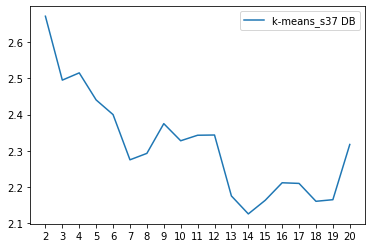

HAav (k = 2) - DB=> 0.663
HAav (k = 3) - DB=> 1.741
HAav (k = 4) - DB=> 2.222
HAav (k = 5) - DB=> 2.314
HAav (k = 6) - DB=> 2.151
HAav (k = 7) - DB=> 2.057
HAav (k = 8) - DB=> 1.958
HAav (k = 9) - DB=> 1.904
HAav (k = 10) - DB=> 1.864
HAav (k = 11) - DB=> 1.941
HAav (k = 12) - DB=> 1.893
HAav (k = 13) - DB=> 1.934
HAav (k = 14) - DB=> 1.891
HAav (k = 15) - DB=> 1.812
HAav (k = 16) - DB=> 1.795
HAav (k = 17) - DB=> 1.810
HAav (k = 18) - DB=> 1.783
HAav (k = 19) - DB=> 1.772
HAav (k = 20) - DB=> 1.746
HAav Média - DB=> 1.855


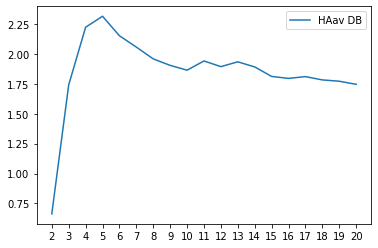

EM (k = 2) - DB=> 2.781
EM (k = 3) - DB=> 2.788
EM (k = 4) - DB=> 2.575
EM (k = 5) - DB=> 2.502
EM (k = 6) - DB=> 2.316
EM (k = 7) - DB=> 2.468
EM (k = 8) - DB=> 2.274
EM (k = 9) - DB=> 2.644
EM (k = 10) - DB=> 2.210
EM (k = 11) - DB=> 2.214
EM (k = 12) - DB=> 2.332
EM (k = 13) - DB=> 2.499
EM (k = 14) - DB=> 2.072
EM (k = 15) - DB=> 2.247
EM (k = 16) - DB=> 2.262
EM (k = 17) - DB=> 2.219
EM (k = 18) - DB=> 2.747
EM (k = 19) - DB=> 2.482
EM (k = 20) - DB=> 2.427
EM Média - DB=> 2.424


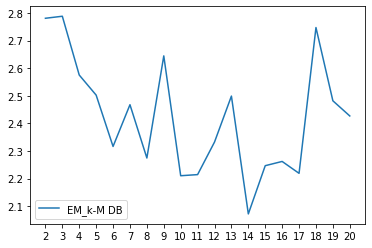

k-Means_37 2k - Silhouette=> 0.118
k-Means_37 3k - Silhouette=> 0.106
k-Means_37 4k - Silhouette=> 0.124
k-Means_37 5k - Silhouette=> 0.116
k-Means_37 6k - Silhouette=> 0.116
k-Means_37 7k - Silhouette=> 0.102
k-Means_37 8k - Silhouette=> 0.122
k-Means_37 9k - Silhouette=> 0.125
k-Means_37 10k - Silhouette=> 0.123
k-Means_37 11k - Silhouette=> 0.123
k-Means_37 12k - Silhouette=> 0.126
k-Means_37 13k - Silhouette=> 0.135
k-Means_37 14k - Silhouette=> 0.136
k-Means_37 15k - Silhouette=> 0.138
k-Means_37 16k - Silhouette=> 0.135
k-Means_37 17k - Silhouette=> 0.132
k-Means_37 18k - Silhouette=> 0.136
k-Means_37 19k - Silhouette=> 0.132
k-Means_37 20k - Silhouette=> 0.122
k-Means_37 Média - Silhouette=> 0.125


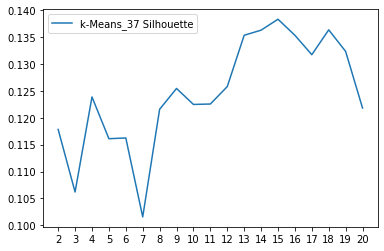

HAav average 2k - Silhouette=> 0.216
HAav average 3k - Silhouette=> 0.065
HAav average 4k - Silhouette=> 0.070
HAav average 5k - Silhouette=> 0.101
HAav average 6k - Silhouette=> 0.106
HAav average 7k - Silhouette=> 0.116
HAav average 8k - Silhouette=> 0.123
HAav average 9k - Silhouette=> 0.131
HAav average 10k - Silhouette=> 0.118
HAav average 11k - Silhouette=> 0.106
HAav average 12k - Silhouette=> 0.132
HAav average 13k - Silhouette=> 0.132
HAav average 14k - Silhouette=> 0.126
HAav average 15k - Silhouette=> 0.124
HAav average 16k - Silhouette=> 0.120
HAav average 17k - Silhouette=> 0.132
HAav average 18k - Silhouette=> 0.138
HAav average 19k - Silhouette=> 0.138
HAav average 20k - Silhouette=> 0.134
HAav average Média - Silhouette=> 0.122


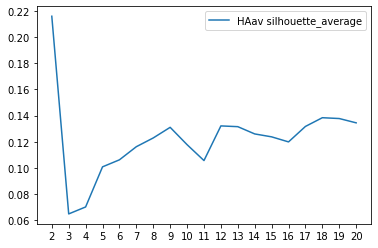

EM_k-M 2k - Silhouette=> 0.118
EM_k-M 3k - Silhouette=> 0.088
EM_k-M 4k - Silhouette=> 0.080
EM_k-M 5k - Silhouette=> 0.099
EM_k-M 6k - Silhouette=> 0.098
EM_k-M 7k - Silhouette=> 0.117
EM_k-M 8k - Silhouette=> 0.116
EM_k-M 9k - Silhouette=> 0.099
EM_k-M 10k - Silhouette=> 0.113
EM_k-M 11k - Silhouette=> 0.109
EM_k-M 12k - Silhouette=> 0.119
EM_k-M 13k - Silhouette=> 0.121
EM_k-M 14k - Silhouette=> 0.128
EM_k-M 15k - Silhouette=> 0.123
EM_k-M 16k - Silhouette=> 0.120
EM_k-M 17k - Silhouette=> 0.124
EM_k-M 18k - Silhouette=> 0.113
EM_k-M 19k - Silhouette=> 0.128
EM_k-M 20k - Silhouette=> 0.123
EM_k-M Média - Silhouette=>0.112


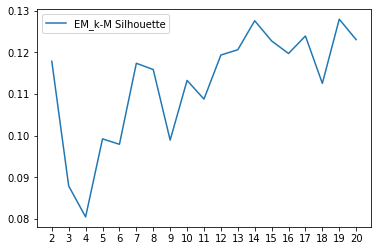

In [25]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture #EM
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import AgglomerativeClustering #Hierarchical
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture #EM

def graf_comparacoes_clusters(dataset1):
  
  ### Importing Dataset
  def plotar(x,y, label):
    plt.plot(x,y, label = label)
    plt.xticks(x) #deixar o eixo x inteiro
    plt.legend() 
    plt.show()
  def silhouette_def(linkag):
    x = []
    y = []
    for i in range(2,21):
      dataset = dataset1.copy()
      ha = AgglomerativeClustering(n_clusters=i, linkage=linkag)
      #ha.fit_predict(dataset)
      ha.fit(dataset)
      indice = silhouette_score(dataset, ha.labels_, metric='euclidean')
      x.append(i)
      y.append(indice)
      print('HAav %s %dk - Silhouette=> %.3f' % (linkag, i, indice))
    media = sum(y)/len(y)
    print('HAav %s Média - Silhouette=> %.3f' % (linkag, media))
    plotar(x,y, 'HAav silhouette_' + linkag)
  

  x = []
  y = []
  #DB com k-means
  for i in range(2,21):
    dataset = dataset1.copy()
    km = KMeans(n_clusters = i, init='k-means++', max_iter=300, n_init=10, random_state=37)
    km.fit(dataset)
    labels = km.fit_predict(dataset)
    metrica = metrics.davies_bouldin_score(dataset, labels)
    print("k-means_s37 (k = %d) - DB=> %0.3f" % (i, metrica))
    x.append(i) 
    y.append(metrica)
    # juntando os labels com o restante do dataset
    #dataset["Cluster"] = 'cluster' + dataset["Cluster"].astype(str)
  media = sum(y)/len(y)
  print('k-means_s37 Média - DB=> %.3f' % (media)) 
  plotar(x,y, 'k-means_s37 DB')

  x = []
  y = []
  #DB com HAav
  for i in range(2,21):
    dataset = dataset1.copy()
    ha = AgglomerativeClustering(n_clusters=i, linkage='average')
    ha.fit(dataset)
    labels = ha.fit_predict(dataset)
    metrica = metrics.davies_bouldin_score(dataset, labels)
    print("HAav (k = %d) - DB=> %0.3f" % (i, metrica)) 
    x.append(i)
    y.append(metrica)
    # juntando os labels com o restante do dataset
    #dataset["Cluster"] = 'cluster' + dataset["Cluster"].astype(str)
  media = sum(y)/len(y)
  print('HAav Média - DB=> %.3f' % (media)) 
  plotar(x,y, 'HAav DB')

  x = []
  y = []
  # DB com EM
  for n_clusters in range(2,21):
    dataset = dataset1.copy()
    gmm = GaussianMixture(n_components= n_clusters, covariance_type='full', init_params='kmeans')
    gmm.fit(dataset)
    labels = gmm.fit_predict(dataset)

    # pegando os labels 
    metrica = metrics.davies_bouldin_score(dataset, labels)
    dataset["Cluster"] = gmm.predict(dataset)
    print("EM (k = %d) - DB=> %0.3f" % (n_clusters, metrica))
    x.append(n_clusters)
    y.append(metrica)
    # juntando os labels com o restante do dataset
    #dataset["Cluster"] = 'cluster' + dataset["Cluster"].astype(str)
  media = sum(y)/len(y)
  print('EM Média - DB=> %.3f' % (media)) 
  plotar(x,y, 'EM_k-M DB')
  

  x = []
  y = []
  #Silhouette com k-means
  for i in range(2,21):
    dataset = dataset1.copy()
    km = KMeans(n_clusters = i, init='k-means++', max_iter=300, n_init=10, random_state=37)
    km.fit(dataset)
    labels = km.fit_predict(dataset)
    indice = silhouette_score(dataset, km.labels_, metric='euclidean')
    print('k-Means_37 %dk - Silhouette=> %.3f' % (i, indice))
    x.append(i) 
    y.append(indice)
    # juntando os labels com o restante do dataset
    #dataset["Cluster"] = 'cluster' + dataset["Cluster"].astype(str)
  media = sum(y)/len(y)
  print('k-Means_37 Média - Silhouette=> %.3f' % (media)) 
  plotar(x,y, 'k-Means_37 Silhouette')


  #silhouette_def('complete')

  #Silhouette com HAav
  silhouette_def('average')

  #silhouette_def('single')

  x = []
  y = []
  #Silhouette com EM_k-M
  for n_clusters in range(2,21):
    dataset = dataset1.copy()
    gmm = GaussianMixture(n_components= n_clusters, covariance_type='full', init_params='kmeans')
    gmm.fit(dataset)
    labels = gmm.fit_predict(dataset)
    indice = silhouette_score(dataset, labels, metric='euclidean') #Aqui vai só o "labels"
    print('EM_k-M %dk - Silhouette=> %.3f' % (n_clusters, indice))
    x.append(n_clusters) 
    y.append(indice)
    # juntando os labels com o restante do dataset
    #dataset["Cluster"] = 'cluster' + dataset["Cluster"].astype(str)
  media = sum(y)/len(y)
  print('EM_k-M Média - Silhouette=>%.3f' % (media)) 
  plotar(x,y, 'EM_k-M Silhouette')

#Gerar
graf_comparacoes_clusters(datasetNorm)